In [1]:
import numpy as np

In [2]:
n = 30
X = np.random.uniform(-3, 5, size=n)

In [3]:
b = [45,-6,1.2,-1,0.1]
hata = np.random.normal(0, 4, size=n)

In [4]:
y = b[0] \
+ b[1] * X \
+ b[2] * X**2 \
+ b[3] * X**3 \
+ b[4] * X**4 + hata

In [5]:
import matplotlib.pyplot as plt

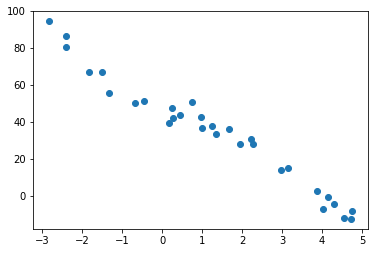

In [6]:
plt.scatter(X,y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = X.reshape(n,1)
y = y.reshape(n,1)
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
## modeli impoert et
# modelin bir instance nı oluştur
## parametreleri seç
## fit metodu ile modeli dataya uydur


In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
classifier = DecisionTreeRegressor(
## buraya parametreler gelecek
)

In [12]:
classifier.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [13]:
classifier.predict(X_train)

array([ -4.09568214,  66.83458291,  50.41754196,  -6.66126458,
        67.35078836,  51.61581893,  37.88990971,  14.01983452,
        -0.21006619,   2.95370339,  55.88449141,  15.33429918,
        -7.90294045,  80.45387915,  28.33271543,  31.1630537 ,
       -11.92888908,  28.10395172,  36.26145679,  44.08984399,
        42.20094136, -12.20503293,  86.61471778,  47.69779181])

In [14]:
y_train

array([[ -4.09568214],
       [ 66.83458291],
       [ 50.41754196],
       [ -6.66126458],
       [ 67.35078836],
       [ 51.61581893],
       [ 37.88990971],
       [ 14.01983452],
       [ -0.21006619],
       [  2.95370339],
       [ 55.88449141],
       [ 15.33429918],
       [ -7.90294045],
       [ 80.45387915],
       [ 28.33271543],
       [ 31.1630537 ],
       [-11.92888908],
       [ 28.10395172],
       [ 36.26145679],
       [ 44.08984399],
       [ 42.20094136],
       [-12.20503293],
       [ 86.61471778],
       [ 47.69779181]])

In [15]:
classifier.score(X_train,y_train)

1.0

In [16]:
classifier.score(X_test,y_test)

0.9168017778881548

In [17]:
x_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_range = classifier.predict(x_range)

In [18]:
y_hip = b[0] \
+ b[1] * x_range \
+ b[2] * x_range**2 \
+ b[3] * x_range**3 \
+ b[4] * x_range**4

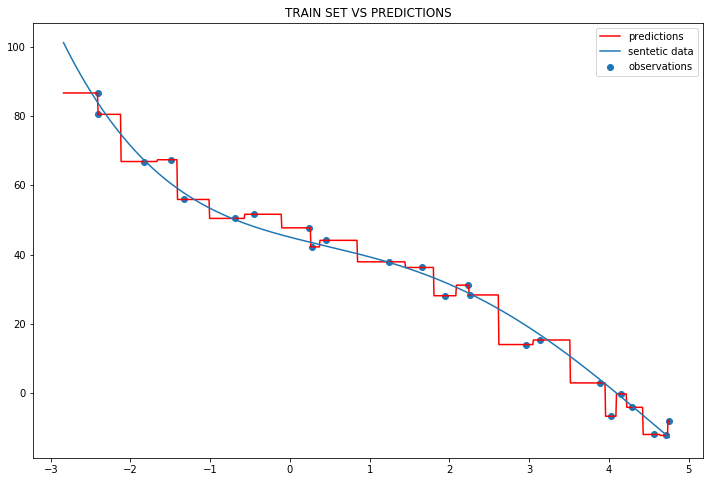

In [19]:
plt.figure(figsize=(12,8))
plt.plot(x_range, y_range, color="red", label="predictions")
plt.scatter(X_train, y_train, label="observations")
plt.plot(x_range, y_hip, label="sentetic data")
plt.title("TRAIN SET VS PREDICTIONS")
plt.legend()

Text(0.5, 1.0, 'TEST SET VS PREDICTIONS')

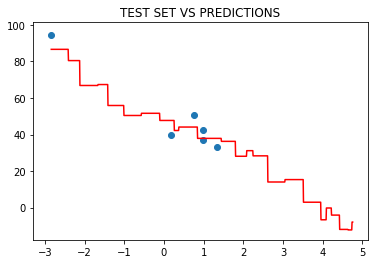

In [20]:
plt.plot(x_range, y_range, color="red")
plt.scatter(X_test, y_test)
plt.title("TEST SET VS PREDICTIONS")

In [21]:
depths = range(1,30)
train = []
test = []

In [22]:
for dep in depths:
    classifier = DecisionTreeRegressor(max_depth=dep)
    classifier.fit(X_train, y_train)
    train.append(classifier.score(X_train, y_train))
    test.append(classifier.score(X_test, y_test))

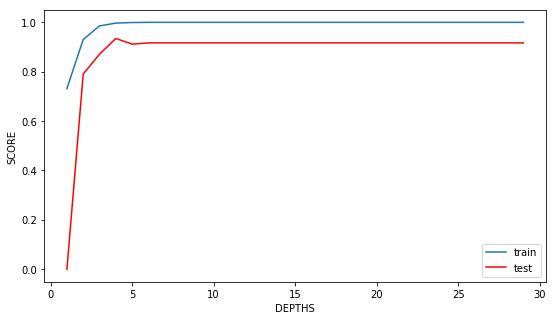

In [23]:
plt.figure(figsize=(9,5))
plt.plot(depths, train, label='train')
plt.plot(depths, test, color='red', label='test')
plt.xlabel('DEPTHS')
plt.ylabel('SCORE')
plt.legend()

In [24]:
test.index(max(test)) # we get the highest score at the max depth=4 because you know index begins from "0"

3